In [1]:
from sklearn.datasets import load_boston
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
import pandas as pd

In [2]:
df = pd.read_csv(r'Merged_IDT.csv')
df.shape

(413, 30)

In [9]:
df

,is_black_box,is_combinational,is_sequential,is_physical_only,is_mapped,is_fixed,is_hard_macro,is_hierarchical,area,width,...,is_dont_scan,is_size_only,is_multibit,mbit_width,is_map_to_multibit,is_memory,is_dont_ungroup,is_pad_cell,is_user_hierarchy,delay_rise_ap
0,False,False,True,False,True,False,False,False,1.39968,2.43,...,False,False,False,1,True,False,False,False,False,0.042723
1,False,False,True,False,True,False,False,False,1.39968,2.43,...,False,False,False,1,True,False,False,False,False,0.046497
2,False,False,True,False,True,False,False,False,1.14048,1.98,...,False,False,False,1,True,False,False,False,False,0.053885
3,False,False,True,False,True,False,False,False,1.14048,1.98,...,False,False,False,1,True,False,False,False,False,0.066676
4,False,False,True,False,True,False,False,False,1.14048,1.98,...,False,False,False,1,True,False,False,False,False,0.047113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,False,False,True,False,True,False,False,False,1.39968,2.43,...,False,False,False,1,True,False,False,False,False,0.034545
409,False,False,True,False,True,False,False,False,1.39968,2.43,...,False,False,False,1,True,False,False,False,False,0.034545
410,False,False,True,False,True,False,False,False,1.39968,2.43,...,False,False,False,1,True,False,False,False,False,0.034545
411,False,False,True,False,True,False,False,False,1.39968,2.43,...,False,False,False,1,True,False,False,False,False,0.042187


In [4]:
df.columns

Index(['is_black_box', 'is_combinational', 'is_sequential', 'is_physical_only',
       'is_mapped', 'is_fixed', 'is_hard_macro', 'is_hierarchical', 'area',
       'width', 'height', 'dont_touch', 'is_dont_touch', 'is_buffer',
       'is_inverter', 'is_latch', 'is_ff', 'is_clock_gate',
       'preserve_boundary', 'is_scan', 'is_dont_scan', 'is_size_only',
       'is_multibit', 'mbit_width', 'is_map_to_multibit', 'is_memory',
       'is_dont_ungroup', 'is_pad_cell', 'is_user_hierarchy', 'delay_rise_ap'],
      dtype='object')

In [50]:
df.is_map_to_multibit.value_counts()

True    413
Name: is_map_to_multibit, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   is_black_box        413 non-null    bool   
 1   is_combinational    413 non-null    bool   
 2   is_sequential       413 non-null    bool   
 3   is_physical_only    413 non-null    bool   
 4   is_mapped           413 non-null    bool   
 5   is_fixed            413 non-null    bool   
 6   is_hard_macro       413 non-null    bool   
 7   is_hierarchical     413 non-null    bool   
 8   area                413 non-null    float64
 9   width               413 non-null    float64
 10  height              413 non-null    float64
 11  dont_touch          413 non-null    bool   
 12  is_dont_touch       413 non-null    bool   
 13  is_buffer           413 non-null    bool   
 14  is_inverter         413 non-null    bool   
 15  is_latch            413 non-null    bool   
 16  is_ff   

In [11]:
df.describe()

,area,width,height,mbit_width,delay_rise_ap
count,413.000000,413.000000,4.130000e+02,413.0,413.000000
mean,1.190688,2.067167,5.760000e-01,1.0,0.036475
std,0.102560,0.178056,4.668592e-15,0.0,0.010991
min,1.140480,1.980000,5.760000e-01,1.0,0.023132
25%,1.140480,1.980000,5.760000e-01,1.0,0.035429
50%,1.140480,1.980000,5.760000e-01,1.0,0.035996
75%,1.140480,1.980000,5.760000e-01,1.0,0.040525
max,1.399680,2.430000,5.760000e-01,1.0,0.137815


In [17]:
print(df["width"][2]*df["height"][2]==df["area"][2])

True


In [7]:
import pandas as pd
X = df.drop(['delay_rise_ap', 'delay_rise', 'error_rate_rise'], axis=1)
y = df['error_rate_rise']  

print(X.head())

KeyError: "['delay_rise' 'error_rate_rise'] not found in axis"

In [22]:
X = df.drop(['delay_rise_ap'], axis=1)
y = df['delay_rise_ap'] 

X.head()

,is_black_box,is_combinational,is_sequential,is_physical_only,is_mapped,is_fixed,is_hard_macro,is_hierarchical,area,width,...,is_scan,is_dont_scan,is_size_only,is_multibit,mbit_width,is_map_to_multibit,is_memory,is_dont_ungroup,is_pad_cell,is_user_hierarchy
0,False,False,True,False,True,False,False,False,1.39968,2.43,...,True,False,False,False,1,True,False,False,False,False
1,False,False,True,False,True,False,False,False,1.39968,2.43,...,True,False,False,False,1,True,False,False,False,False
2,False,False,True,False,True,False,False,False,1.14048,1.98,...,True,False,False,False,1,True,False,False,False,False
3,False,False,True,False,True,False,False,False,1.14048,1.98,...,True,False,False,False,1,True,False,False,False,False
4,False,False,True,False,True,False,False,False,1.14048,1.98,...,True,False,False,False,1,True,False,False,False,False


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.head(2))                                              # Standardizing Data 
print(X_train.head(2))

(276, 29)
(137, 29)
(276,)
(137,)
    is_black_box  is_combinational  is_sequential  is_physical_only  \
83         False             False           True             False   
92         False             False           True             False   

    is_mapped  is_fixed  is_hard_macro  is_hierarchical     area  width  ...  \
83       True     False          False            False  1.39968   2.43  ...   
92       True     False          False            False  1.14048   1.98  ...   

    is_scan  is_dont_scan  is_size_only  is_multibit  mbit_width  \
83     True         False         False        False           1   
92     True         False         False        False           1   

    is_map_to_multibit  is_memory  is_dont_ungroup  is_pad_cell  \
83                True      False            False        False   
92                True      False            False        False   

    is_user_hierarchy  
83              False  
92              False  

[2 rows x 29 columns]
    is_bl

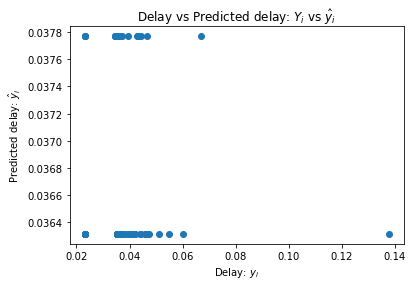

In [24]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, y_train)


y_pred_from_sklearn = lm.predict(X_test)

plt.scatter(y_test, y_pred_from_sklearn)
plt.xlabel("Delay: $y_i$")
plt.ylabel("Predicted delay: $\hat{y}_i$")
plt.title("Delay vs Predicted delay: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error

print("The mean squared error is:",mean_squared_error(y_test, y_pred_from_sklearn))

The mean squared error is: 0.00013700415198089792


In [53]:
X = df[['mbit_width','area']]
y = df['delay_rise_ap'] 

X.head()

,mbit_width,area
0,1,1.39968
1,1,1.39968
2,1,1.14048
3,1,1.14048
4,1,1.14048


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)


In [55]:
lm = LinearRegression()
lm.fit(X_train, y_train)


y_pred_from_sklearn = lm.predict(X_test)


In [56]:
from sklearn.metrics import mean_squared_error

print("The mean squared error is:",mean_squared_error(y_test, y_pred_from_sklearn))

The mean squared error is: 0.00013700858006037635


In [25]:
sklearn_pred_df = pd.DataFrame(
    {
        'Actual Value' : y_test, 
     'Predicted Values' : y_pred_from_sklearn
    }
)
sklearn_pred_df.head(10)

,Actual Value,Predicted Values
336,0.037576,0.036316
140,0.035696,0.036316
52,0.035190,0.036316
75,0.036030,0.037769
157,0.036065,0.036316
278,0.037516,0.036316
357,0.023132,0.036316
201,0.036192,0.036316
71,0.035764,0.037769
404,0.034545,0.037769


In [26]:
X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

     is_black_box  is_combinational  is_sequential  is_physical_only  \
83            NaN               NaN            NaN               NaN   
92            NaN               NaN            NaN               NaN   
45            NaN               NaN            NaN               NaN   
261           NaN               NaN            NaN               NaN   
46            NaN               NaN            NaN               NaN   
..            ...               ...            ...               ...   
400           NaN               NaN            NaN               NaN   
118           NaN               NaN            NaN               NaN   
189           NaN               NaN            NaN               NaN   
206           NaN               NaN            NaN               NaN   
355           NaN               NaN            NaN               NaN   

     is_mapped  is_fixed  is_hard_macro  is_hierarchical      area     width  \
83         NaN       NaN            NaN              Na